In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance  as yf
import numpy as np
import datetime as dt
from scipy.stats import norm
import matplotlib.pyplot as plt
from tabulate import tabulate

The Value at Risk is a statistic that provides an estimate of the maximum loss from a given position or portfolio over a period of time.

The inputs necessary for the implementation of the variance-covariance method to calculate the Value at Risk are: confidance intervall, standard diviation and mean.

In [5]:
ticker_symbols = ["TSLA", "AAPL", "GOOGL", "AMZN", "SHOP", "MSFT", "DIS", "QCOM", "NVDA", "V"]

# 10% for each stock
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

initial_invest = 1000000

# Get close prices data 
data = yf.download(ticker_symbols, start="2020-01-01", end="2022-06-22")["Close"]
data.head()

[*********************100%***********************]  10 of 10 completed


,AAPL,AMZN,DIS,GOOGL,MSFT,NVDA,QCOM,SHOP,TSLA,V
Date,,,,,,,,,,
2020-01-02,75.087502,94.900497,148.199997,1368.680054,160.619995,59.977501,88.690002,407.809998,86.052002,191.119995
2020-01-03,74.357498,93.748497,146.500000,1361.520020,158.619995,59.017502,87.019997,404.290009,88.601997,189.600006
2020-01-06,74.949997,95.143997,145.649994,1397.810059,159.029999,59.264999,86.510002,413.329987,90.307999,189.190002
2020-01-07,74.597504,95.343002,145.699997,1395.109985,157.580002,59.982498,88.970001,414.500000,93.811996,188.690002
2020-01-08,75.797501,94.598503,145.399994,1405.040039,160.089996,60.095001,88.709999,418.100006,98.428001,191.919998


In [6]:
returns = data.pct_change()
returns.head()

             AAPL        AMZN         DIS       GOOGL        MSFT        NVDA  \
count  621.000000  621.000000  621.000000  621.000000  621.000000  621.000000   
mean     0.001231    0.000494   -0.000461    0.001008    0.000975    0.002247   
std      0.023486    0.023451    0.023930    0.021030    0.021841    0.034928   
min     -0.128647   -0.140494   -0.129846   -0.116342   -0.147390   -0.184521   
25%     -0.010092   -0.011653   -0.011474   -0.008267   -0.009210   -0.016006   
50%      0.000988    0.001084   -0.001175    0.001845    0.000965    0.003060   
75%      0.014158    0.012076    0.010535    0.012060    0.012335    0.022708   
max      0.119808    0.135359    0.144123    0.092411    0.142169    0.171564   

             QCOM        SHOP        TSLA           V  
count  621.000000  621.000000  621.000000  621.000000  
mean     0.000959    0.000627    0.004504    0.000269  
std      0.028860    0.044094    0.046901    0.022018  
min     -0.149453   -0.175518   -0.210628   -0

In [7]:
returns.describe()

,AAPL,AMZN,DIS,GOOGL,MSFT,NVDA,QCOM,SHOP,TSLA,V
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000
mean,0.001231,0.000494,-0.000461,0.001008,0.000975,0.002247,0.000959,0.000627,0.004504,0.000269
std,0.023486,0.023451,0.023930,0.021030,0.021841,0.034928,0.028860,0.044094,0.046901,0.022018
min,-0.128647,-0.140494,-0.129846,-0.116342,-0.147390,-0.184521,-0.149453,-0.175518,-0.210628,-0.135472
25%,-0.010092,-0.011653,-0.011474,-0.008267,-0.009210,-0.016006,-0.013484,-0.023298,-0.020566,-0.009935
50%,0.000988,0.001084,-0.001175,0.001845,0.000965,0.003060,0.000345,0.001623,0.002618,0.000721
75%,0.014158,0.012076,0.010535,0.012060,0.012335,0.022708,0.015636,0.024126,0.027533,0.010681
max,0.119808,0.135359,0.144123,0.092411,0.142169,0.171564,0.152209,0.186528,0.198949,0.138426


In [9]:
# Create covariance matrix
cov = returns.cov()
print(cov)

           AAPL      AMZN       DIS     GOOGL      MSFT      NVDA      QCOM  \
AAPL   0.000552  0.000361  0.000271  0.000355  0.000416  0.000585  0.000454   
AMZN   0.000361  0.000550  0.000228  0.000324  0.000352  0.000539  0.000392   
DIS    0.000271  0.000228  0.000573  0.000277  0.000276  0.000377  0.000302   
GOOGL  0.000355  0.000324  0.000277  0.000442  0.000375  0.000522  0.000406   
MSFT   0.000416  0.000352  0.000276  0.000375  0.000477  0.000586  0.000440   
NVDA   0.000585  0.000539  0.000377  0.000522  0.000586  0.001220  0.000726   
QCOM   0.000454  0.000392  0.000302  0.000406  0.000440  0.000726  0.000833   
SHOP   0.000545  0.000620  0.000330  0.000481  0.000542  0.000987  0.000605   
TSLA   0.000569  0.000514  0.000379  0.000449  0.000525  0.000894  0.000615   
V      0.000328  0.000224  0.000354  0.000307  0.000331  0.000441  0.000346   

           SHOP      TSLA         V  
AAPL   0.000545  0.000569  0.000328  
AMZN   0.000620  0.000514  0.000224  
DIS    0.000330 

In [10]:
# Mean returns for each stock
stock_mean_returns = returns.mean()
# Mean returns for portfolio
portfolio_mean_return = stock_mean_returns.dot(weights)
# Portfolio std
portfolio_std = np.sqrt(weights.T.dot(cov).dot(weights))
# Mean investment
mean_invstment = (1+portfolio_mean_return) * initial_invest
# Std of the investment
std_inv = initial_invest * portfolio_std

In [11]:
# Cofidance intervall
VaR_90 = norm.ppf(1-0.9, mean_invstment, std_inv)
VaR_95 = norm.ppf(1-0.95, mean_invstment, std_inv)
VaR_99 = norm.ppf(1-0.99, mean_invstment, std_inv)
loss_90 = initial_invest - VaR_90
loss_95 = initial_invest - VaR_95
loss_99 = initial_invest - VaR_99

print(tabulate([['90%', VaR_90, loss_90], ['95%', VaR_95,loss_95], ['99%', VaR_99, loss_99]], headers=['Confidance Level', 'Value at Risk', 'Will not exceed']))

Confidance Level      Value at Risk    Will not exceed
------------------  ---------------  -----------------
90%                          972305            27694.9
95%                          964118            35882.1
99%                          948760            51239.8


With a 90% confidance, our portfolio of 1M will not exceed losses greater than 27.6K usd over one day period. In 95% confidance that value is 35.8k and at 99% is 51.2k.

1 day VaR at 95% confidence: 35882.09
2 day VaR at 95% confidence: 50744.94
3 day VaR at 95% confidence: 62149.6
4 day VaR at 95% confidence: 71764.18
5 day VaR at 95% confidence: 80234.79
6 day VaR at 95% confidence: 87892.81
7 day VaR at 95% confidence: 94935.08
8 day VaR at 95% confidence: 101489.87
9 day VaR at 95% confidence: 107646.27
10 day VaR at 95% confidence: 113469.13
11 day VaR at 95% confidence: 119007.43
12 day VaR at 95% confidence: 124299.2
13 day VaR at 95% confidence: 129374.71
14 day VaR at 95% confidence: 134258.48
15 day VaR at 95% confidence: 138970.73


<function matplotlib.pyplot.show(close=None, block=None)>

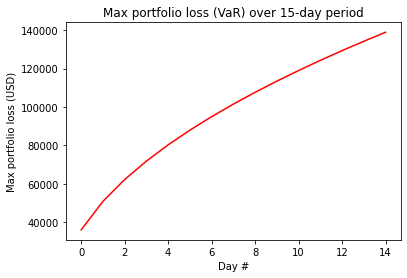

In [12]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(loss_95 * np.sqrt(x),2))
    print(str(x) + " day VaR at 95% confidence: " + str(np.round(loss_95 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")
plt.show